<a href="https://colab.research.google.com/github/poomshift/ComfyUI-Colab-Alchemist/blob/main/ComfyUI-Colab-Alchemist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

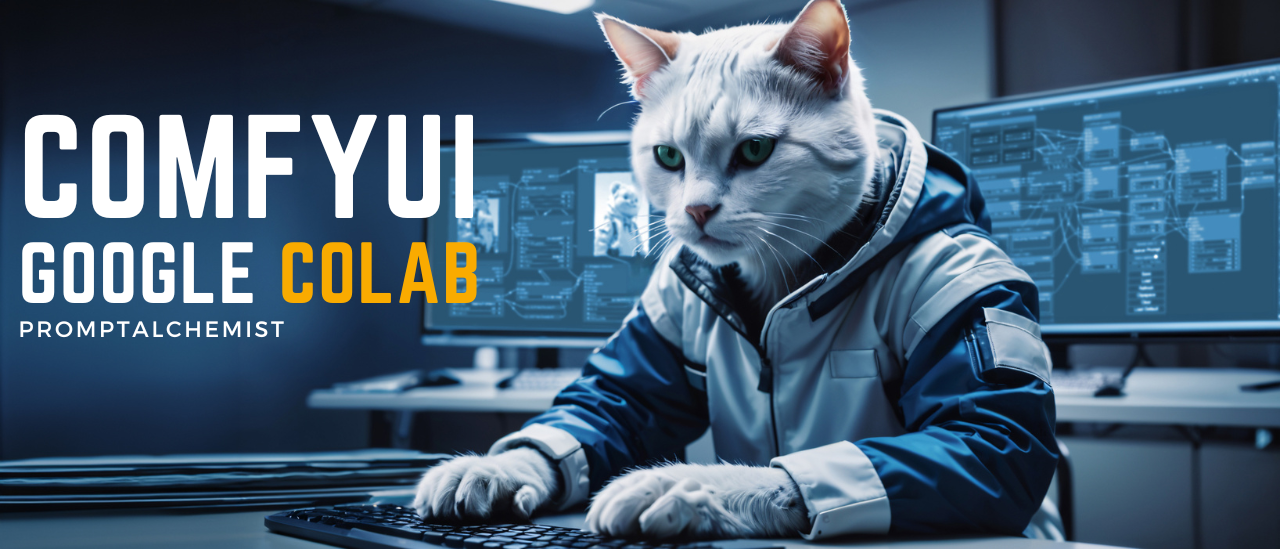

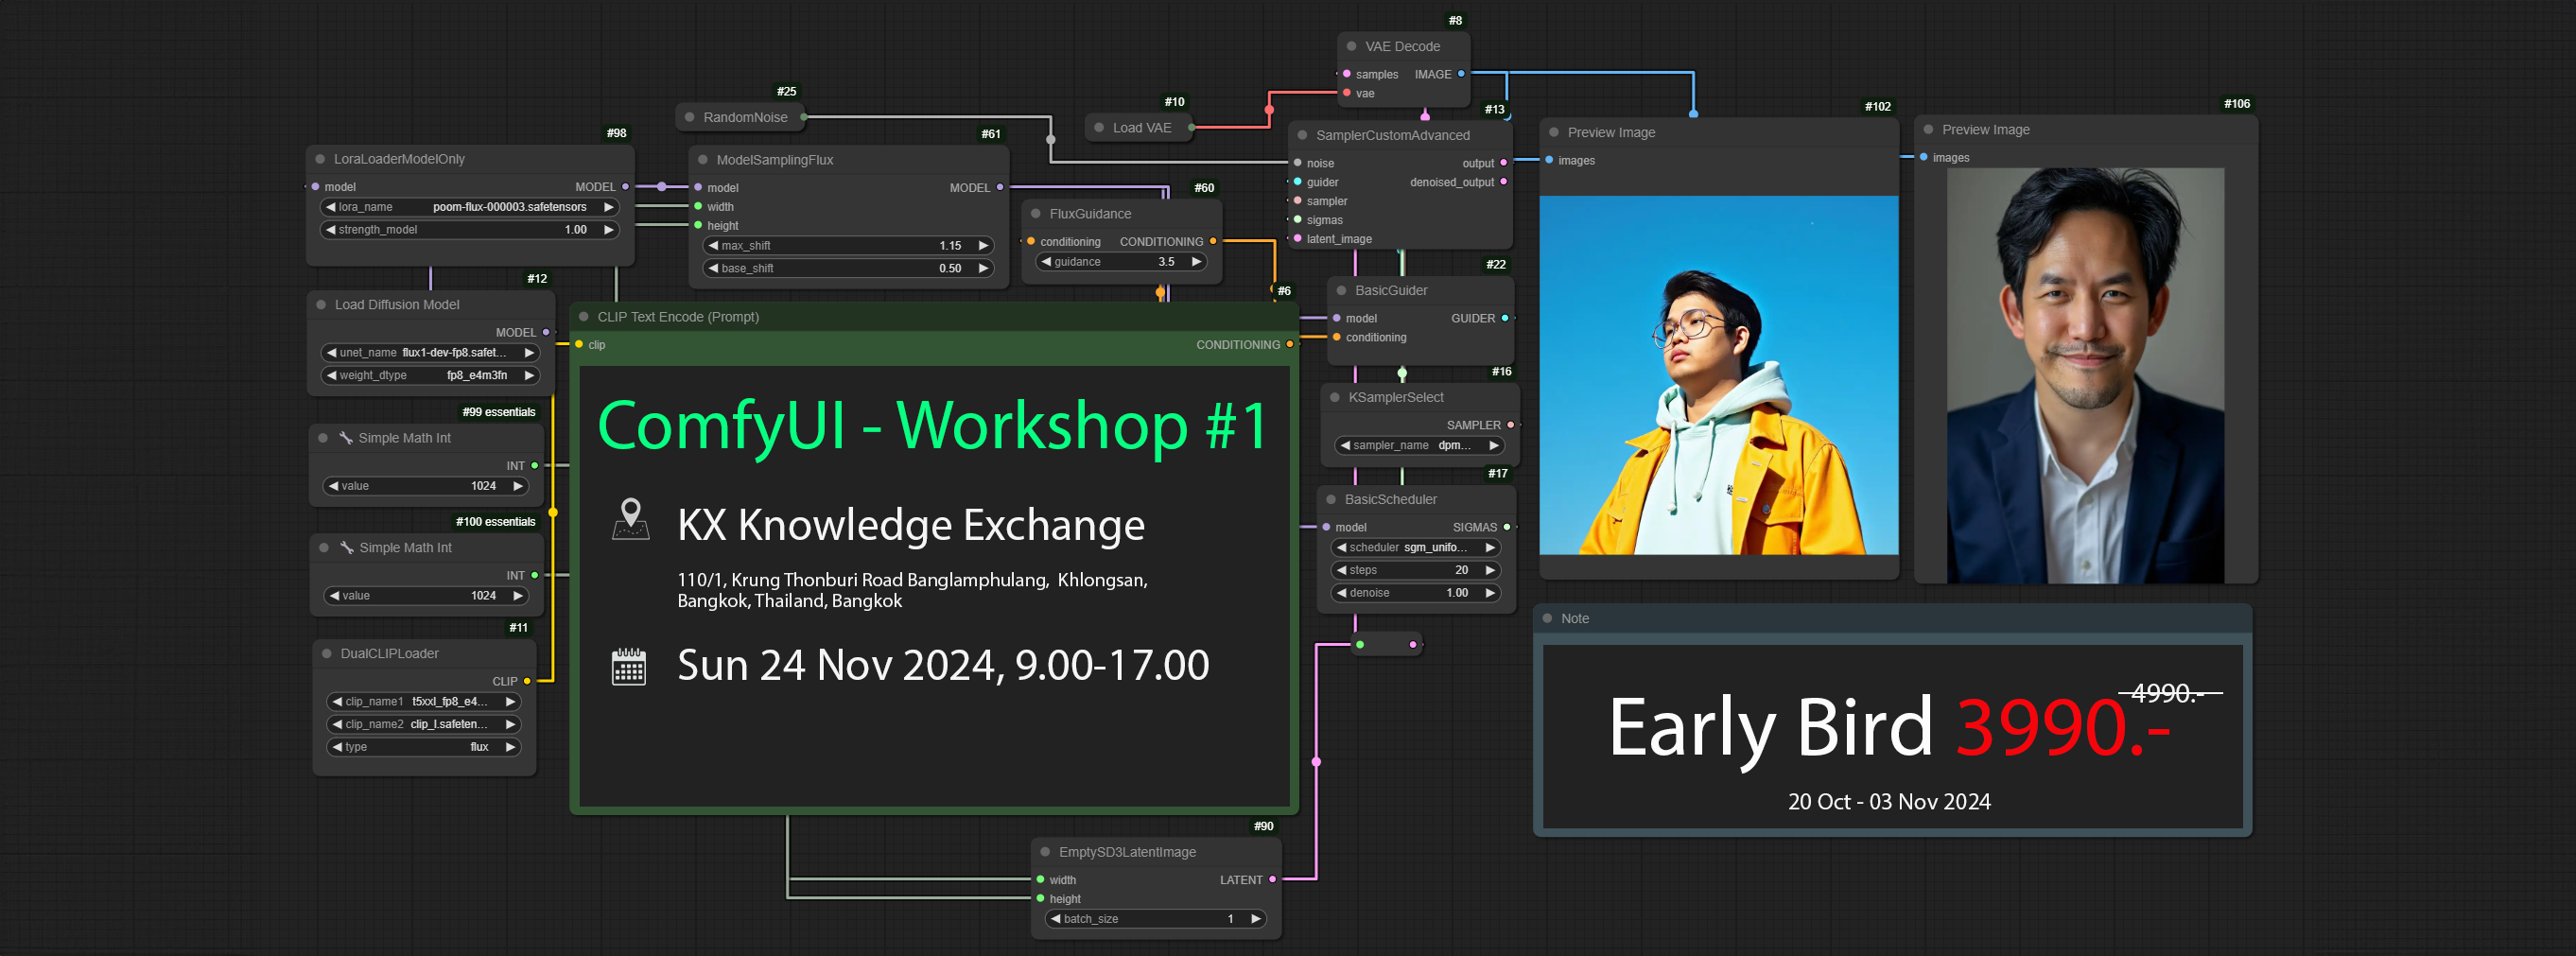

ComfyUI Workshop #1: ยกระดับงานออกแบบของคุณด้วย AI | วันอาทิตย์ที่ 24 พฤศจิกายน 2024

รายละเอียดเพิ่มเติม 👉 https://www.alchemistskill.com/comfyui-workshop-24-nov-2024/

##Prompt Alchemist’s ComfyUI Colab
📢 พบปัญหาการใช้งาน กรุณาแจ้งมาที่ [Facebook/promptalchemist](https://www.facebook.com/PromptAlchemist)


📝 สมัคร Google Colab Pro [คลิกที่นี่](https://colab.research.google.com/signup)

>ราคา 343฿ ต่อเดือน ได้รับ 100 computing units

>การใช้งานประมาณ 1.76 units/hr = ชั่วโมงละ 6.14฿

📃 คู่มือการใช้งานอย่างละเอียด - [คลิกที่นี่](https://www.alchemistskill.com/how-to-use-comfyui-on-google-colab/)

📹 วีดีโอสอนการใช้งาน - work in progress..

Installed Custom nodes:

>| ComfyUI Impact Pack| ComfyUI Essentials | Comfyui Controlnet Aux |

>| DZ-FaceDetailer | ComfyUI IPAdapter Plus | ComfyUI UltimateSDUpscale |

>| LivePortraitKJ | VideoHelperSuite | GGUF

ไฟล์ภาพจะถูกเซฟไว้ที่ Google Drive MyDrive/ComfyUI_output

**ถ้าต้องการใช้ LoRA จาก Google Drive ให้สร้างโฟเดอร์**

>"**Lora**"


In [ ]:
#@markdown #1. ติดตั้ง ComfyUI | Models | Custom nodes
from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets
from google.colab import drive
import os
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)

%cd /content
drive.mount('/content/drive')

output_directory = "/content/drive/MyDrive/ComfyUI_output"
# Check if the directory already exists
if not os.path.exists(output_directory):
    # Create the directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)
    print(f"Directory '{output_directory}' created successfully.")
else:
    print(f"Directory '{output_directory}' already exists.")


#ติดตั้ง comfy
!git clone https://github.com/comfyanonymous/ComfyUI

#comfyUI setting
%cd ComfyUI
!mkdir user
%cd user
!mkdir default
%cd default
!wget https://raw.githubusercontent.com/poomshift/ComfyUI-Colab-Alchemist/main/comfy.settings.json

#ติดตั้ง Dependencies
%cd /content/ComfyUI
!apt -y install -qq aria2
!pip install xformers!=0.0.18 -r requirements.txt  --extra-index-url https://download.pytorch.org/whl/cu118

#cloudflare tunnel
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

#Checkpoints
%cd /content/ComfyUI/models/checkpoints

#@markdown Checkpoints เริ่มต้น
# LEOSAM_HelloWorld_XL_V7 = True # @param {type:"boolean"}
# if LEOSAM_HelloWorld_XL_V7 == True:
#   !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://civitai.com/api/download/models/570138
# else:
#   ()

PonyDiffusionV6XL = False # @param {type:"boolean"}
if PonyDiffusionV6XL == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/Magamanny/Pony-Diffusion-V6-XL/resolve/main/ponyDiffusionV6XL_v6StartWithThisOne.safetensors -o PonyDiffusionV6XL.safetensors
else:
  ()

DreamShaperXL_lightning = False # @param {type:"boolean"}
if DreamShaperXL_lightning == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://civitai.com/api/download/models/354657 -o DreamShaperXL_lightning.safetensors
else:
  ()

# majicMIX_realistic_V7 = True # @param {type:"boolean"}
# if majicMIX_realistic_V7 == True:
#   !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://civitai.com/api/download/models/176425 -o majicmixRealisticV7.safetensors
# else:
#   ()

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/uwg/upscaler/resolve/main/ESRGAN/8x_NMKD-Superscale_150000_G.pth -d /content/ComfyUI/models/upscale_models -o 8x_NMKD-Superscale_150000_G.pth

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/black-forest-labs/FLUX.1-schnell/resolve/main/ae.safetensors -d /content/ComfyUI/models/vae -o ae.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/clip_l.safetensors -d /content/ComfyUI/models/clip -o clip_l.safetensors


Flux1_Dev_Fp8 = False # @param {type:"boolean"}
if Flux1_Dev_Fp8 == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/Kijai/flux-fp8/resolve/main/flux1-dev-fp8.safetensors -d /content/ComfyUI/models/unet -o flux1-dev-fp8.safetensors
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/comfyanonymous/flux_text_encoders/resolve/main/t5xxl_fp8_e4m3fn.safetensors -d /content/ComfyUI/models/clip -o t5xxl_fp8_e4m3fn.safetensors
else:
  ()

Flux1_Dev_Q5_GGUF = False # @param {type:"boolean"}
if Flux1_Dev_Q5_GGUF == True:
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/city96/FLUX.1-dev-gguf/resolve/main/flux1-dev-Q5_0.gguf -d /content/ComfyUI/models/unet -o flux1-dev-Q5_0.gguf
  !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/city96/t5-v1_1-xxl-encoder-gguf/resolve/main/t5-v1_1-xxl-encoder-Q5_K_M.gguf -d /content/ComfyUI/models/clip -o t5-v1_1-xxl-encoder-Q5_K_M.gguf
else:
  ()

#alimama inpaint controlnet
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/jasperai/Flux.1-dev-Controlnet-Upscaler/resolve/main/diffusion_pytorch_model.safetensors -d /content/ComfyUI/models/controlnet/ -o Flux.1-dev-Controlnet-Upscaler.safetensors
#alimama flux turbo lora
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/alimama-creative/FLUX.1-Turbo-Alpha/resolve/main/diffusion_pytorch_model.safetensors -d /content/ComfyUI/models/loras/ -o FLUX.1-Turbo-Alpha.safetensors

#@markdown ใส่โมเดลเพิ่มเติม
#Civitai API
Civitai_API_key = "" #@param {type:"string"}

# @markdown Checkpoint Model ID จาก Civitai

Checkpoint_01 = ""  #@param {type:"string"}
Checkpoint_02 = ""  #@param {type:"string"}
Checkpoint_03 = ""  #@param {type:"string"}

# Function to construct and execute download command
def download_checkpoint(checkpoint_url, api_key):
    if checkpoint_url:
        formatted_url = f"https://civitai.com/api/download/models/{checkpoint_url}?token={api_key}"
        download_command = f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "{formatted_url}"'
        print(download_command)
        # Uncomment the following line to actually execute the command
        !{download_command}
    else:
        print("Checkpoint URL is blank, skipping download.")

# Execute download commands for each checkpoint
download_checkpoint(Checkpoint_01, Civitai_API_key)
download_checkpoint(Checkpoint_02, Civitai_API_key)
download_checkpoint(Checkpoint_03, Civitai_API_key)

#Loras
%cd /content/ComfyUI/models/loras

# @markdown LoRA Model ID จาก Civitai

LoRA_01 = "132876"  #@param {type:"string"}
LoRA_02 = ""  #@param {type:"string"}
LoRA_03 = ""  #@param {type:"string"}

# Function to construct and execute download command
def download_lora(Lora_url, api_key):
    if Lora_url:
        formatted_url = f"https://civitai.com/api/download/models/{Lora_url}?token={api_key}"
        download_command = f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "{formatted_url}"'
        print(download_command)
        # Uncomment the following line to actually execute the command
        !{download_command}
    else:
        print("Lora URL is blank, skipping download.")

# Execute download commands for each checkpoint
download_lora(LoRA_01, Civitai_API_key)
download_lora(LoRA_02, Civitai_API_key)
download_lora(LoRA_03, Civitai_API_key)

%cd /content/ComfyUI/models/vae

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://civitai.com/api/download/models/290640?type=VAE&format=SafeTensor
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://civitai.com/api/download/models/311162

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/xinsir/controlnet-union-sdxl-1.0/resolve/main/diffusion_pytorch_model.safetensors -d /content/ComfyUI/models/controlnet -o controlnet-union-sdxl.safetensors



%cd /content/ComfyUI/custom_nodes
!git clone https://github.com/ltdrdata/ComfyUI-Manager.git
!git clone https://github.com/ltdrdata/ComfyUI-Impact-Pack
!git clone https://github.com/cubiq/ComfyUI_essentials
!git clone https://github.com/Fannovel16/comfyui_controlnet_aux
!git clone https://github.com/nicofdga/DZ-FaceDetailer
!git clone https://github.com/cubiq/ComfyUI_IPAdapter_plus
!git clone https://github.com/ssitu/ComfyUI_UltimateSDUpscale --recursive
!git clone https://github.com/kijai/ComfyUI-LivePortraitKJ
!git clone https://github.com/Kosinkadink/ComfyUI-VideoHelperSuite
!git clone https://github.com/kijai/ComfyUI-KJNodes
!git clone https://github.com/city96/ComfyUI-GGUF

%cd /content/ComfyUI/custom_nodes/ComfyUI-GGUF
!pip install -r requirements.txt

%cd /content/ComfyUI/custom_nodes/ComfyUI-KJNodes
!pip install -r requirements.txt
%cd /content/ComfyUI/custom_nodes/ComfyUI-LivePortraitKJ
!pip install -r requirements.txt
%cd /content/ComfyUI/custom_nodes/ComfyUI-Impact-Pack
!python install-manual.py

#LivePortraitKJ models
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/appearance_feature_extractor.safetensors -d /content/ComfyUI/models/liveportrait -o appearance_feature_extractor.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/landmark.onnx -d /content/ComfyUI/models/liveportrait -o landmark.onnx
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/landmark_model.pth -d /content/ComfyUI/models/liveportrait -o landmark_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/motion_extractor.safetensors -d /content/ComfyUI/models/liveportrait -o motion_extractor.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/spade_generator.safetensors -d /content/ComfyUI/models/liveportrait -o spade_generator.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/stitching_retargeting_module.safetensors -d /content/ComfyUI/models/liveportrait -o stitching_retargeting_module.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Kijai/LivePortrait_safetensors/resolve/main/warping_module.safetensors -d /content/ComfyUI/models/liveportrait -o warping_module.safetensors


# %cd /content/ComfyUI/models/clip_vision
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/image_encoder/model.safetensors  -o CLIP-ViT-H-14-laion2B-s32B-b79K.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/image_encoder/model.safetensors  -o CLIP-ViT-bigG-14-laion2B-39B-b160k.safetensors

# %cd /content/ComfyUI/models

# !mkdir ipadapter

# %cd /content/ComfyUI/models/ipadapter
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter_sd15.safetensors  -o ip-adapter_sd15.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter_sd15_light_v11.bin  -o ip-adapter_sd15_light_v11.bin
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter-plus_sd15.safetensors  -o ip-adapter-plus_sd15.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter-plus-face_sd15.safetensors  -o ip-adapter-plus-face_sd15.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter-full-face_sd15.safetensors  -o ip-adapter-full-face_sd15.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/models/ip-adapter_sd15_vit-G.safetensors  -o ip-adapter_sd15_vit-G.safetensors


# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter_sdxl_vit-h.safetensors  -o ip-adapter_sdxl_vit-h.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter-plus_sdxl_vit-h.safetensors  -o ip-adapter-plus_sdxl_vit-h.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter-plus-face_sdxl_vit-h.safetensors  -o ip-adapter-plus-face_sdxl_vit-h.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M -c https://huggingface.co/h94/IP-Adapter/resolve/main/sdxl_models/ip-adapter_sdxl.safetensors  -o ip-adapter_sdxl.safetensors


!cp -av /content/drive/MyDrive/Lora/* /content/ComfyUI/models/loras/
#!cp -av /content/drive/MyDrive/Checkpoint/* /content/ComfyUI/models/checkpoints/


%cd /content/ComfyUI


inf('\u2714 Done','success', '50px')


In [ ]:
#@markdown #2. Run ComfyUI
%cd /content/ComfyUI
import subprocess
import threading
import time
import socket
import urllib.request
from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)

def iframe_thread(port):
  while True:
      time.sleep(0.5)
      sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
      result = sock.connect_ex(('127.0.0.1', port))
      if result == 0:
        break
      sock.close()
  print("\nComfyUI finished loading, trying to launch cloudflared (if it gets stuck here cloudflared is having issues)\n")

  p = subprocess.Popen(["cloudflared", "tunnel", "--url", "http://127.0.0.1:{}".format(port)], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  for line in p.stderr:
    l = line.decode()
    if "trycloudflare.com " in l:
      print("This is the URL to access ComfyUI:", l[l.find("http"):], end='')
    #print(l, end='')


threading.Thread(target=iframe_thread, daemon=True, args=(8188,)).start()

!python main.py --dont-print-server --output-directory /content/drive/MyDrive/ComfyUI_output

#เครื่องมือเพิ่มเติม

In [ ]:
from IPython.display import clear_output
from IPython.display import Javascript
import ipywidgets as widgets
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 200})'''))
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)

#@markdown #Civitai downloader
#Civitai API
Civitai_API_key = "" #@param {type:"string"}
Model_type = "checkpoints" # @param ["checkpoints", "loras", "controlnet", "unet"]
Model_ID = "537505" #@param {type:"string"}

# Construct the URL using the model ID
Url = f"https://civitai.com/api/download/models/{Model_ID}"

# Display the constructed download command
download_command = f'aria2c --console-log-level=error -c -x 16 -s 16 -k 1M "{Url}?token={Civitai_API_key}" -d "/content/ComfyUI/models/{Model_type}"'
print(download_command)

# Execute the download command
# Uncomment the following line to actually execute the command
!{download_command}
